In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
SYMH = pd.read_csv('2012-11-13_SYMH.txt', delimiter='\s+')
SYMH['Date'] = pd.to_datetime(SYMH['DATE']+' '+SYMH['TIME'], format="%Y-%m-%d %H:%M:%S.%f")
SYMH.drop(['DATE', 'TIME'], axis=1, inplace=True)

AE = pd.read_csv('2012-11-13_AE.txt', delimiter='\s+')
AE['Date'] = pd.to_datetime(AE['DATE']+' '+AE['TIME'], format="%Y-%m-%d %H:%M:%S.%f")
AE.drop(['DATE', 'TIME'], axis=1, inplace=True)

In [4]:
Omni_AE = pd.read_csv('Omni_SWMF_AE_2012.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Omni_AE['Date'] = pd.to_datetime(Omni_AE[['year', 'month', 'day', 'hour', 'minute']])
Omni_AE.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_AE = pd.read_csv('Artemis_SWMF_AE_2012.txt', sep='\s+', header=None, comment='#', usecols=[0,1,2,3,4,34], names=['year', 'month', 'day', 'hour', 'minute', 'AE'])
Artemis_AE['Date'] = pd.to_datetime(Artemis_AE[['year', 'month', 'day', 'hour', 'minute']])
Artemis_AE.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)


Omni_SYMH = pd.read_csv('Omni_SWMF_SYMH_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Omni_SYMH['Date'] = pd.to_datetime(Omni_SYMH[['year', 'month', 'day', 'hour', 'minute']])
Omni_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_SYMH = pd.read_csv('Artemis_SWMF_SYMH_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7], names=['year', 'month', 'day', 'hour', 'minute', 'DST'])
Artemis_SYMH['Date'] = pd.to_datetime(Artemis_SYMH[['year', 'month', 'day', 'hour', 'minute']])
Artemis_SYMH.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

In [1]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)

plt.plot(SYMH['Date'], SYMH['SYM-H'], label='SYM-H (Actual)')
plt.plot(Artemis_SYMH['Date'], Artemis_SYMH['DST'], label='Artemis SYM-H')
plt.plot(Omni_SYMH['Date'], Omni_SYMH['DST'], label='OMNI SYM-H')
plt.legend(loc='lower left')

ax.set(ylabel='SYM-H (nT)', xlabel='Time UTC',xlim=(SYMH['Date'].min(), SYMH['Date'].max()))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.grid(visible=True, which='major', axis='both', c='0.7')

plt.suptitle('SYM-H (Kyoto) Compared to OMNI and ARTEMIS Simulations, SWMF')
plt.tight_layout()
plt.savefig('plots/SYMH-2012.jpg')

NameError: name 'plt' is not defined

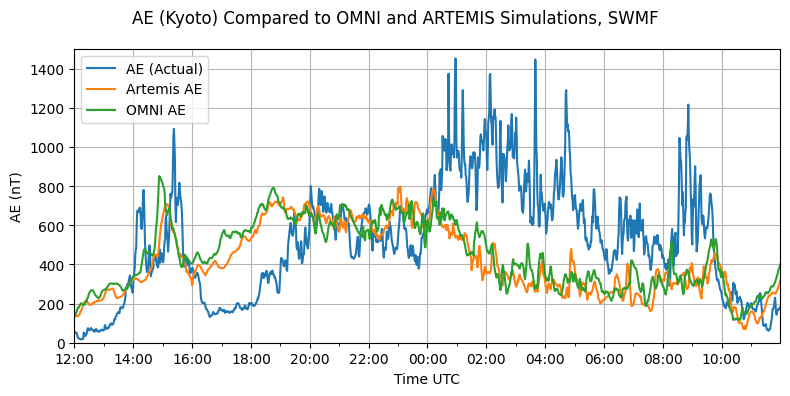

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)

plt.plot(AE['Date'], AE['AE'], label='AE (Actual)')
plt.plot(Artemis_AE['Date'], Artemis_AE['AE'], label='Artemis AE')
plt.plot(Omni_AE['Date'], Omni_AE['AE'], label='OMNI AE')

plt.legend(loc='upper left')

ax.set(ylabel='AE (nT)', xlabel='Time UTC', xlim=(AE['Date'].min(), AE['Date'].max()), ylim=(0, 1500))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.grid(visible=True, which='major', axis='both', c='0.7')

plt.suptitle('AE (Kyoto) Compared to OMNI and ARTEMIS Simulations, SWMF')
plt.tight_layout()
plt.savefig('plots/AE-2012.jpg')

In [5]:
with open('ampere-2012.txt', 'r') as f:
    header_row = f.readline().strip().split(', ')
ampere = pd.read_csv('ampere-2012.txt', delimiter='\s+', skiprows=1, names=header_row)
ampere.reset_index(drop=True, inplace=True)

ampere['Date'] = pd.to_datetime(ampere[['year', 'month', 'day', 'hour', 'minute']])
ampere.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

In [8]:
Omni_Currents = pd.read_csv('OMNI_SWMF_Diss_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Omni_Currents['Date'] = pd.to_datetime(Omni_Currents[['year', 'month', 'day', 'hour', 'minute']])
Omni_Currents.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

Artemis_Currents = pd.read_csv('Artemis_SWMF_Diss_2012.txt', sep='\s+', header=None,comment='#', usecols=[0,1,2,3,4,7,13], names=['year', 'month', 'day', 'hour', 'minute', 'current', 'diss'])
Artemis_Currents['Date'] = pd.to_datetime(Artemis_Currents[['year', 'month', 'day', 'hour', 'minute']])
Artemis_Currents.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)

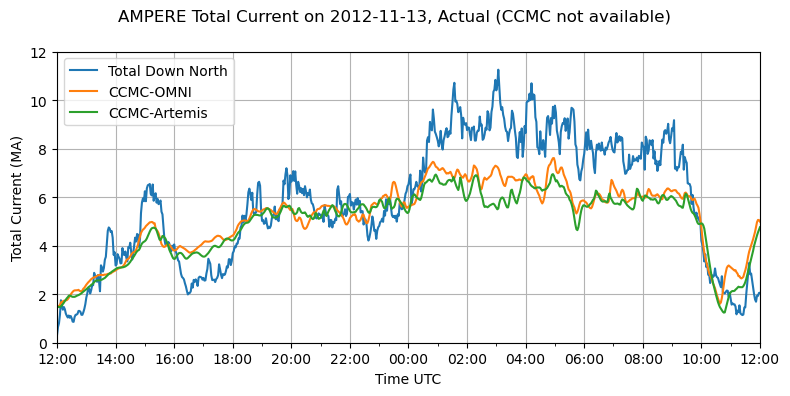

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)

plt.plot(ampere['Date'], -1* ampere['I total down North [MA]'], label='Total Down North')
plt.plot(Omni_Currents['Date'], Omni_Currents['current'], label='CCMC-OMNI')
plt.plot(Artemis_Currents['Date'], Artemis_Currents['current'], label='CCMC-Artemis')

plt.legend(loc='upper left')

ax.set(ylabel='Total Current (MA)', xlabel='Time UTC', xlim=(ampere['Date'].min(), ampere['Date'].max()), ylim=(0, 12))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.grid(visible=True, which='major', axis='both', c='0.7')

plt.suptitle('AMPERE Total Current on 2012-11-13, Actual (CCMC not available)')
plt.tight_layout()
plt.savefig('plots/Current-2012.jpg')

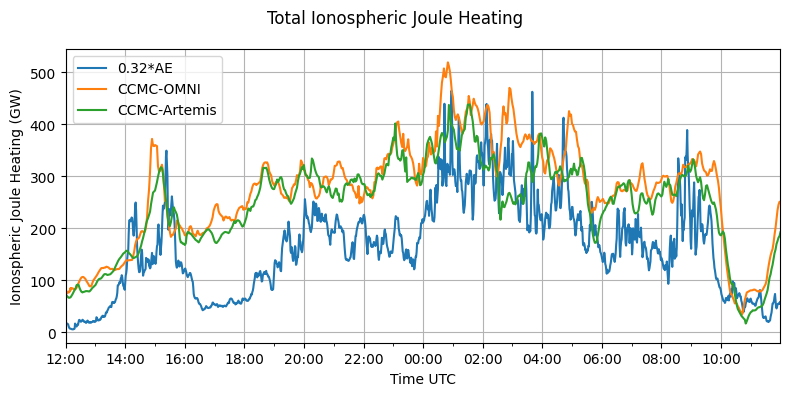

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)

plt.plot(AE['Date'], AE['AE']*0.32, label='0.32*AE')
plt.plot(Omni_Currents['Date'], Omni_Currents['diss'], label='CCMC-OMNI')
plt.plot(Artemis_Currents['Date'], Artemis_Currents['diss'], label='CCMC-Artemis')

plt.legend(loc='upper left')

ax.set(ylabel='Power (GW)', xlabel='Time UTC', xlim=(AE['Date'].min(), AE['Date'].max()))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.grid(visible=True, which='major', axis='both', c='0.7')

plt.suptitle('Total Ionospheric Joule Heating')
plt.tight_layout()
plt.savefig('plots/Joule-2012.jpg')

In [6]:
artemis_data = pd.read_csv('inputs/Artemis_SWMF_Input_2012.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
artemis_data['Date'] = pd.to_datetime(artemis_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
artemis_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

omni_data = pd.read_csv('inputs/Omni_SWMF_Input_2012.txt', sep='\s+', header=None, names=['year', 'month', 'day', 'hour', 'minute', 'second', 'ms', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T'])
omni_data['Date'] = pd.to_datetime(omni_data[['year', 'month', 'day', 'hour', 'minute', 'second', 'ms']])
omni_data.drop(['year', 'month', 'day', 'hour', 'minute', 'second', 'ms'], axis=1, inplace=True)

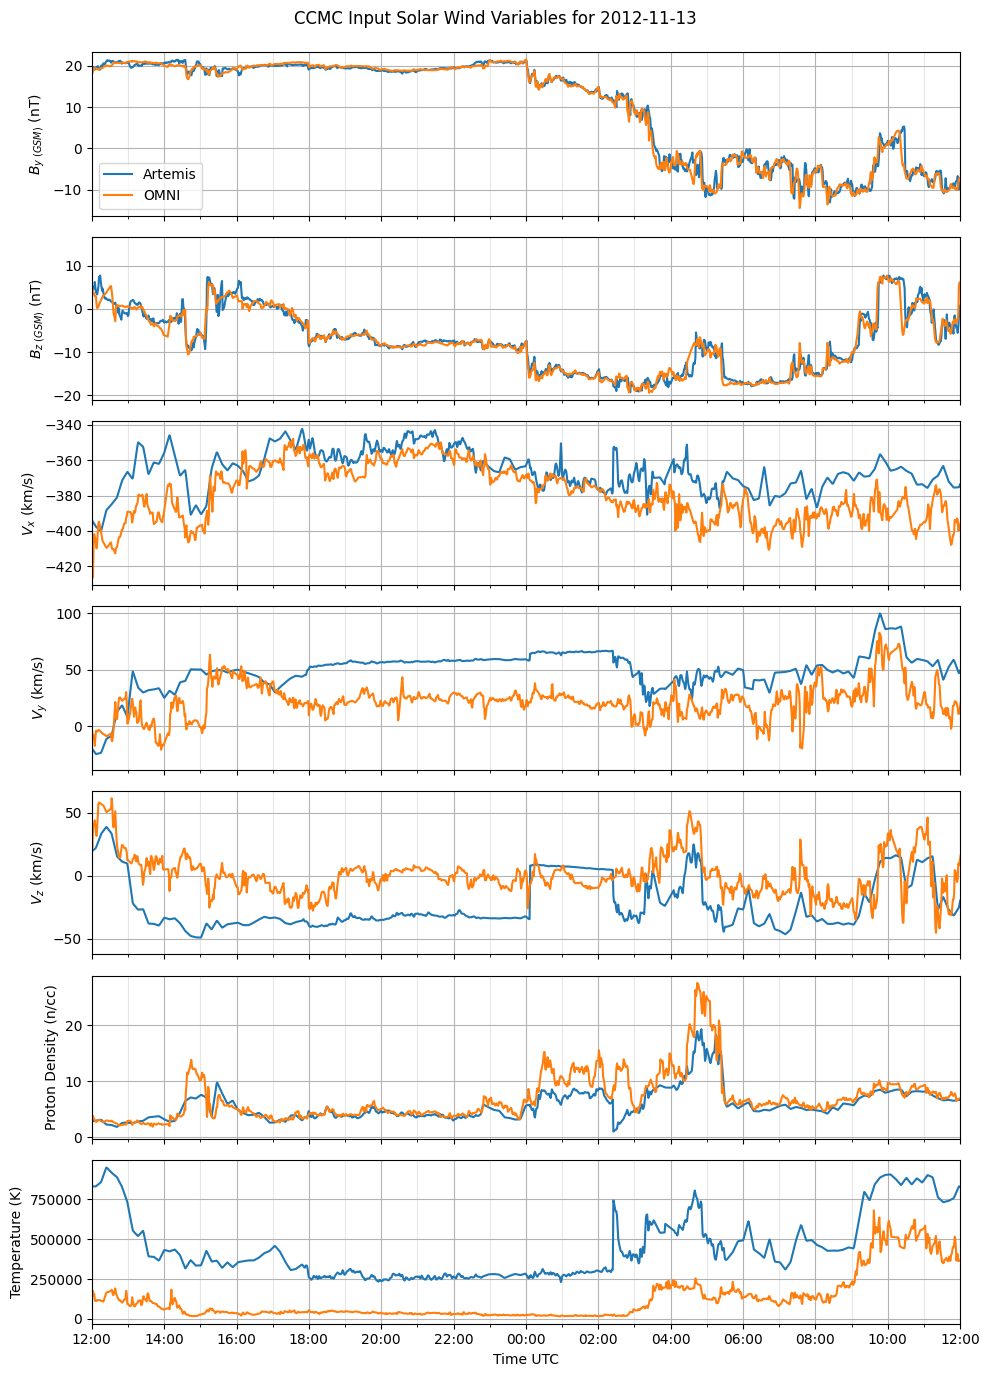

In [19]:
keys = ['By', 'Bz', 'Vx', 'Vy', 'Vz', 'N', 'T']
names = ['$B_{y\ (GSM)}$', '$B_{z\ (GSM)}$', '$V_x$', '$V_y$', '$V_z$', 'Proton Density', 'Temperature']
units = ['nT', 'nT', 'km/s', 'km/s', 'km/s', 'n/cc', 'K']

event_dates = ['2012-11-13']

for i in event_dates:
    fig, axs = plt.subplots(len(keys), 1, sharex=True, figsize=(10, 2 * len(keys)))
    for j, (key, name, unit) in enumerate(zip(keys, names, units)):

        axs[j].plot(artemis_data['Date'], artemis_data[key], label='Artemis')
        axs[j].plot(omni_data['Date'], omni_data[key], label='OMNI')
        axs[j].set_ylabel(f'{name} ({unit})')
        axs[j].set_xlim([artemis_data['Date'].min() + pd.Timedelta(hours=1), artemis_data['Date'].max()])

    for a in axs:
        a.grid(visible=True, which='major', axis='both', c='0.7')
        a.grid(visible=True, which='minor', axis='both', c='0.9', linestyle = '-')

    axs[-1].xaxis.set_major_locator(mdates.HourLocator(interval=2))
    axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[-1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    axs[0].legend(loc='lower left')
    axs[-1].set_xlabel('Time UTC')
    plt.tight_layout()

    if not artemis_data.empty and artemis_data['Date'].notnull().any():
        plt.suptitle(f"CCMC Input Solar Wind Variables for {i}")

plt.subplots_adjust(top=0.95)
plt.savefig('plots/Series-2012.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'plots/combinedmetrics-2012.jpg'

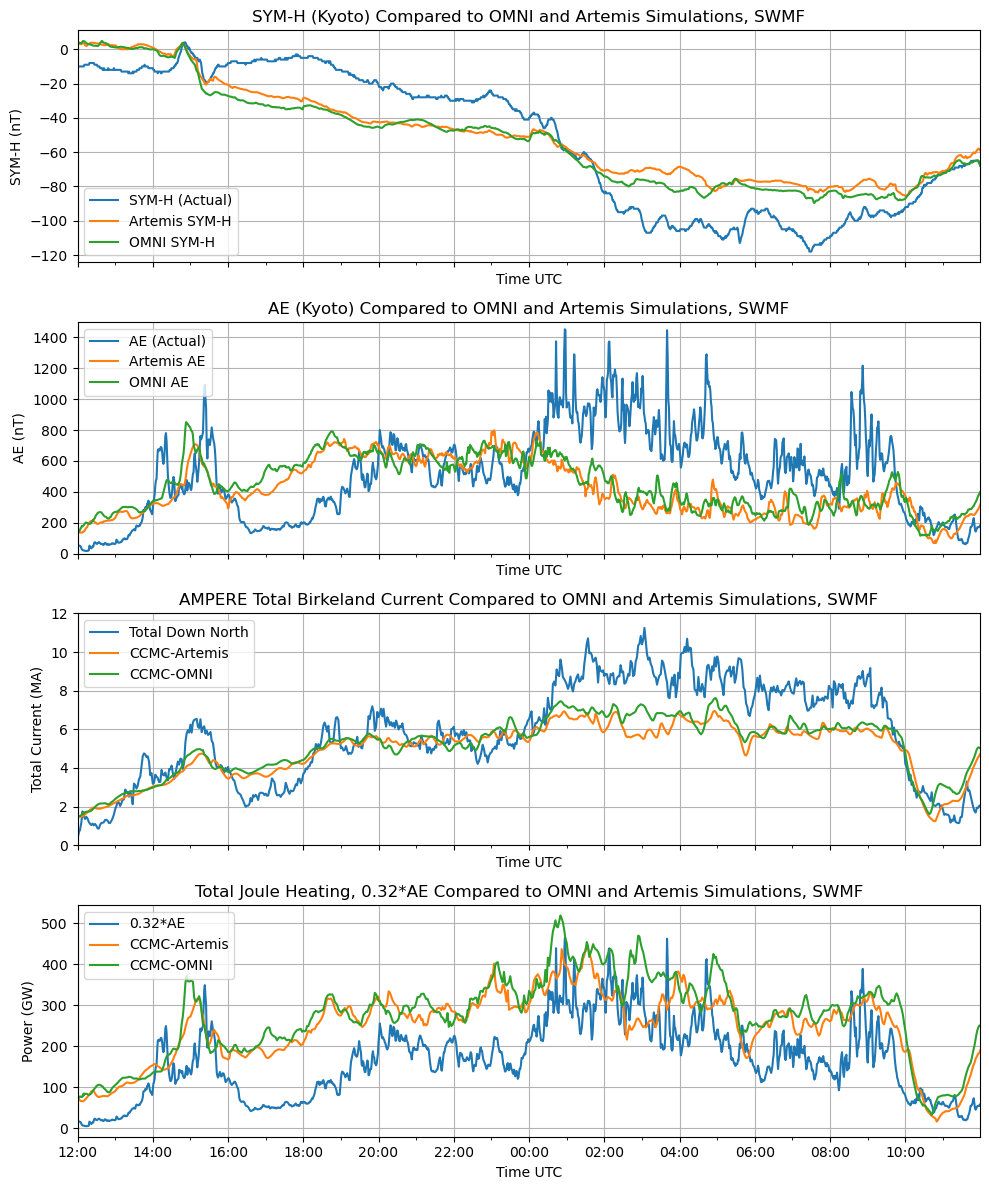

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(10,12), sharex=True)

axs[0].plot(SYMH['Date'], SYMH['SYM-H'], label='SYM-H (Actual)')
axs[0].plot(Artemis_SYMH['Date'], Artemis_SYMH['DST'], label='Artemis SYM-H')
axs[0].plot(Omni_SYMH['Date'], Omni_SYMH['DST'], label='OMNI SYM-H')
axs[0].legend(loc='lower left')
axs[0].set(ylabel='SYM-H (nT)', xlabel='Time UTC', title='SYM-H (Kyoto) Compared to OMNI and Artemis Simulations, SWMF', xlim=(SYMH['Date'].min(), SYMH['Date'].max()))

axs[1].plot(AE['Date'], AE['AE'], label='AE (Actual)')
axs[1].plot(Artemis_AE['Date'], Artemis_AE['AE'], label='Artemis AE')
axs[1].plot(Omni_AE['Date'], Omni_AE['AE'], label='OMNI AE')
axs[1].legend(loc='upper left')
axs[1].set(ylabel='AE (nT)', xlabel='Time UTC', title='AE (Kyoto) Compared to OMNI and Artemis Simulations, SWMF', xlim=(AE['Date'].min(), AE['Date'].max()), ylim=(0, 1500))

axs[2].plot(ampere['Date'], -1* ampere['I total down North [MA]'], label='Total Down North')
axs[2].plot(Artemis_Currents['Date'], Artemis_Currents['current'], label='CCMC-Artemis')
axs[2].plot(Omni_Currents['Date'], Omni_Currents['current'], label='CCMC-OMNI')
axs[2].legend(loc='upper left')
axs[2].set(ylabel='Total Current (MA)', xlabel='Time UTC', title='AMPERE Total Birkeland Current Compared to OMNI and Artemis Simulations, SWMF', xlim=(ampere['Date'].min(), ampere['Date'].max()), ylim=(0, 12))

axs[3].plot(AE['Date'], AE['AE']*0.32, label='0.32*AE')
axs[3].plot(Artemis_Currents['Date'], Artemis_Currents['diss'], label='CCMC-Artemis')
axs[3].plot(Omni_Currents['Date'], Omni_Currents['diss'], label='CCMC-OMNI')
axs[3].legend(loc='upper left')
axs[3].set(ylabel='Power (GW)', xlabel='Time UTC', title='Total Joule Heating, 0.32*AE Compared to OMNI and Artemis Simulations, SWMF', xlim=(AE['Date'].min(), AE['Date'].max()))


axs[3].xaxis.set_major_locator(mdates.HourLocator(interval=2))
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[3].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
for a in axs:
    a.grid(visible=True, which='major', axis='both', c='0.7')

plt.tight_layout()
plt.savefig('plots/combinedmetrics-2012.jpg')

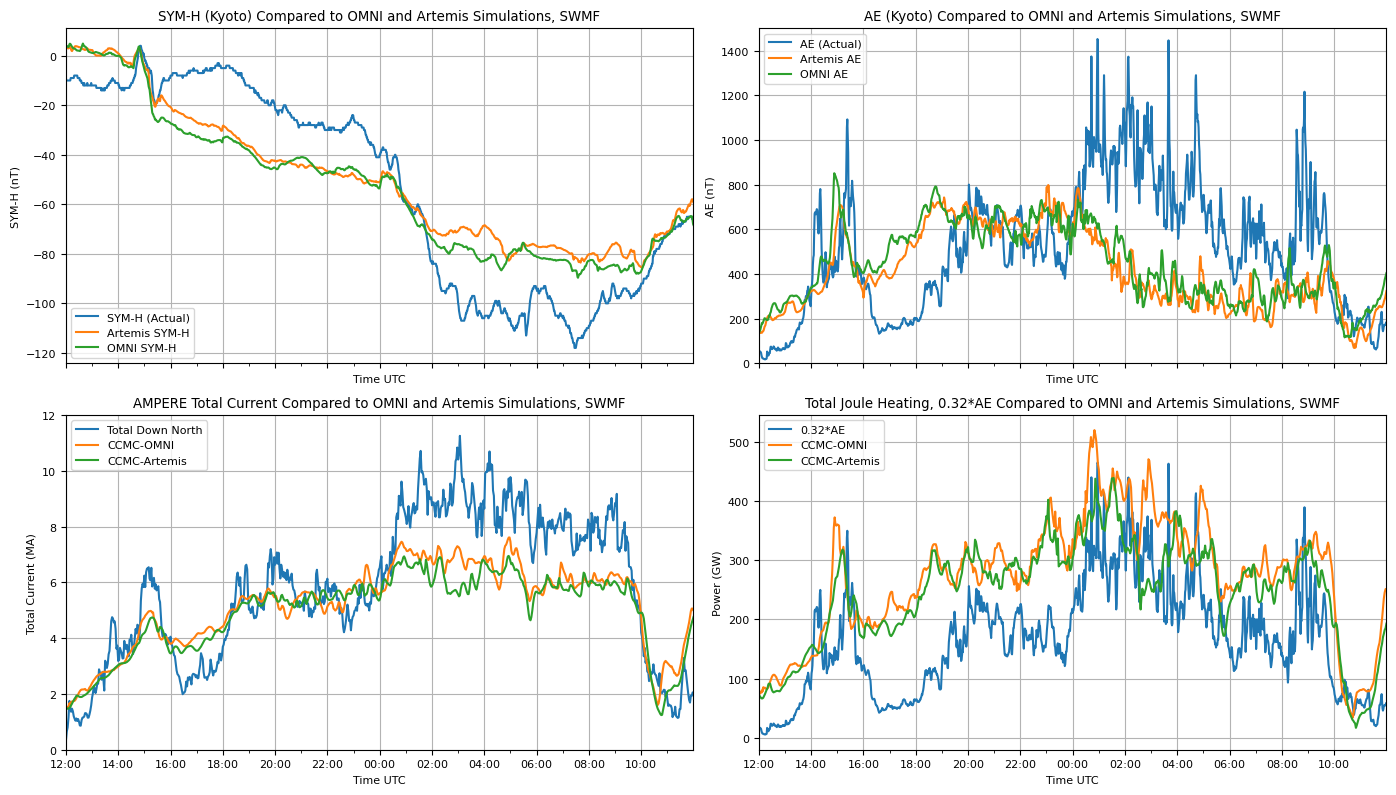

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(14,8), sharex=True)
plt.rcParams.update({'font.size': 8})


axs[0,0].plot(SYMH['Date'], SYMH['SYM-H'], label='SYM-H (Actual)')
axs[0,0].plot(Artemis_SYMH['Date'], Artemis_SYMH['DST'], label='Artemis SYM-H')
axs[0,0].plot(Omni_SYMH['Date'], Omni_SYMH['DST'], label='OMNI SYM-H')
axs[0,0].legend(loc='lower left')
axs[0,0].set(ylabel='SYM-H (nT)', xlabel='Time UTC', title='SYM-H (Kyoto) Compared to OMNI and Artemis Simulations, SWMF', xlim=(SYMH['Date'].min(), SYMH['Date'].max()))

axs[0,1].plot(AE['Date'], AE['AE'], label='AE (Actual)')
axs[0,1].plot(Artemis_AE['Date'], Artemis_AE['AE'], label='Artemis AE')
axs[0,1].plot(Omni_AE['Date'], Omni_AE['AE'], label='OMNI AE')
axs[0,1].legend(loc='upper left')
axs[0,1].set(ylabel='AE (nT)', xlabel='Time UTC', title='AE (Kyoto) Compared to OMNI and Artemis Simulations, SWMF', xlim=(AE['Date'].min(), AE['Date'].max()), ylim=(0, 1500))

axs[1,0].plot(ampere['Date'], -1* ampere['I total down North [MA]'], label='Total Down North')
axs[1,0].plot(Omni_Currents['Date'], Omni_Currents['current'], label='CCMC-OMNI')
axs[1,0].plot(Artemis_Currents['Date'], Artemis_Currents['current'], label='CCMC-Artemis')
axs[1,0].legend(loc='upper left')
axs[1,0].set(ylabel='Total Current (MA)', xlabel='Time UTC', title='AMPERE Total Current Compared to OMNI and Artemis Simulations, SWMF', xlim=(ampere['Date'].min(), ampere['Date'].max()), ylim=(0, 12))

axs[1,1].plot(AE['Date'], AE['AE']*0.32, label='0.32*AE')
axs[1,1].plot(Omni_Currents['Date'], Omni_Currents['diss'], label='CCMC-OMNI')
axs[1,1].plot(Artemis_Currents['Date'], Artemis_Currents['diss'], label='CCMC-Artemis')
axs[1,1].legend(loc='upper left')
axs[1,1].set(ylabel='Power (GW)', xlabel='Time UTC', title='Total Joule Heating, 0.32*AE Compared to OMNI and Artemis Simulations, SWMF', xlim=(AE['Date'].min(), AE['Date'].max()))


axs[1,1].xaxis.set_major_locator(mdates.HourLocator(interval=2))
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1,1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))

for a in range(2):
    for b in range(2):
        axs[a,b].grid(visible=True, which='major', axis='both', c='0.7')

plt.tight_layout()
plt.savefig('plots/combinedmetrics-2x2-2012.jpg')